In [1]:
# sudo pip3 install sklearn --user
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#df = pd.read_csv("demo_dataset.csv")
df = pd.read_csv("datasets/aggreated_data.csv",low_memory=False)
df = df[df['accident_severity']>1]
df.shape


(281683, 70)

In [2]:
df=df.dropna() # The dataset is huge, therefore, dropping any rows with missing values is fine

In [3]:
df.shape

(171942, 70)

In [4]:
df1 = df[['special_conditions_at_site','pedestrian_movement','age_of_vehicle','sex_of_driver','age_of_driver','junction_location','junction_detail','junction_control','did_police_officer_attend_scene_of_accident','day_of_week','accident_severity']]
df1.shape

(171942, 11)

In [5]:
df1.replace(-1, np.nan, inplace=True)
df1=df1.dropna() # I drop all the rows with missing data once again
df1.shape

(67595, 11)

In [6]:

df1['accident_severity'].value_counts()

3    59312
2     8283
Name: accident_severity, dtype: int64

In [7]:
df_majority = df1[df1.accident_severity==3]
df_minority = df1[df1.accident_severity==2]

from sklearn.utils import resample
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=8283,     # to match minority class
                                 random_state=123) # reproducible results
df1 = pd.concat([df_majority_downsampled, df_minority])
df1.accident_severity.value_counts()



3    8283
2    8283
Name: accident_severity, dtype: int64

In [8]:
Y1 = df1.accident_severity.values
X1 = df1.loc[:, df1.columns != 'accident_severity']

Accurate: 
 60.05
Classification report: 
              precision    recall  f1-score   support

          2       0.60      0.60      0.60      2700
          3       0.61      0.61      0.61      2767

avg / total       0.60      0.60      0.60      5467



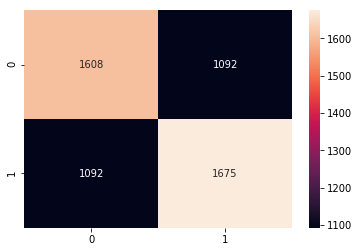

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=99)
classifier = SVC()
classifier.fit(X_train1, Y_train1)
Y_pred = classifier.predict(X_test1)
acc_svc1 = round(classifier.score(X_test1, Y_test1) * 100, 2)
cm = confusion_matrix(Y_test1,Y_pred)
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
print('Accurate: \n',acc_svc1)
print('Classification report: \n',classification_report(Y_test1,Y_pred))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()



Accurate: 
 60.05
Classification report: 
              precision    recall  f1-score   support

          2       0.56      0.59      0.57      2700
          3       0.58      0.55      0.56      2767

avg / total       0.57      0.57      0.57      5467



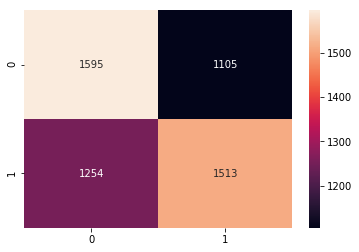

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train1, Y_train1)
Y_pred = classifier.predict(X_test1)
acc_knn1 = round(classifier.score(X_test1, Y_test1) * 100, 2)
cm = confusion_matrix(Y_test1,Y_pred)
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
print('Accurate: \n',acc_svc1)
print('Classification report: \n',classification_report(Y_test1,Y_pred))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()


Accurate: 
 60.79
Classification report: 
              precision    recall  f1-score   support

          2       0.56      0.59      0.57      2700
          3       0.58      0.55      0.56      2767

avg / total       0.57      0.57      0.57      5467



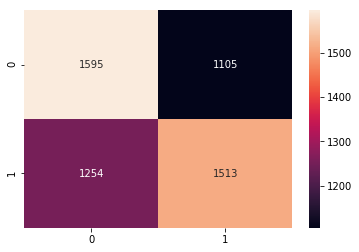

In [11]:

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
Y_pred = classifier.predict(X_test1)
acc_log1 = round(logreg.score(X_train1, Y_train1) * 100, 2)


cm = confusion_matrix(Y_test1,Y_pred)
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
print('Accurate: \n',acc_log1)
print('Classification report: \n',classification_report(Y_test1,Y_pred))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()




Accurate: 
 62.04
Classification report: 
              precision    recall  f1-score   support

          2       0.61      0.66      0.63      2700
          3       0.64      0.58      0.61      2767

avg / total       0.62      0.62      0.62      5467



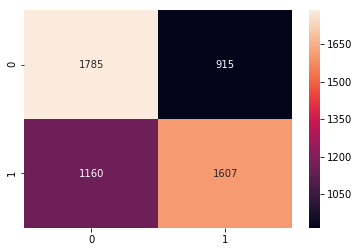

In [12]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree1 = round(decision_tree.score(X_test1, Y_test1) * 100, 2)
acc_decision_tree1


cm = confusion_matrix(Y_test1,Y_pred)
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
print('Accurate: \n',acc_decision_tree1)
print('Classification report: \n',classification_report(Y_test1,Y_pred))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()


Accurate: 
 63.44
Classification report: 
              precision    recall  f1-score   support

          2       0.62      0.68      0.65      2700
          3       0.65      0.59      0.62      2767

avg / total       0.64      0.63      0.63      5467



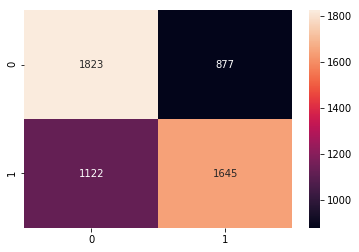

In [13]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, Y_train1)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_train1, Y_train1)
acc_random_forest1 = round(random_forest.score(X_test1, Y_test1) * 100, 2)
acc_random_forest1


cm = confusion_matrix(Y_test1,Y_pred)
# Confusion matrix with random forest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
print('Accurate: \n',acc_random_forest1)
print('Classification report: \n',classification_report(Y_test1,Y_pred))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [14]:
print("Machine Learning algorithm scores without weather related conditions")
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Score': [acc_svc1, acc_knn1, acc_log1, 
              acc_random_forest1, acc_decision_tree1]})
models.sort_values(by='Score', ascending=False)


Machine Learning algorithm scores without weather related conditions


,Model,Score
3,Random Forest,63.44
4,Decision Tree,62.04
2,Logistic Regression,60.79
0,Support Vector Machines,60.05
1,KNN,56.85
